In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [35]:
df = pd.DataFrame(iris.data)
df = df[[0,1]]
df.head()

,0,1
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


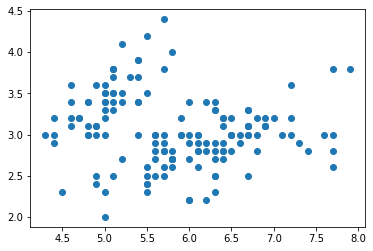

In [38]:
plt.scatter(df[0],df[1])

In [45]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[[0]],df[[1]])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0])

In [50]:
df['cluster'] = y_predicted
df.tail()

,0,1,cluster
145,6.7,3.0,2
146,6.3,2.5,0
147,6.5,3.0,2
148,6.2,3.4,0
149,5.9,3.0,0


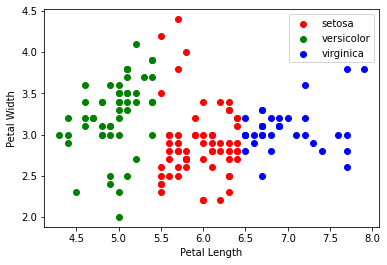

In [56]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1[0],df1[1], color='red', label=iris.target_names[0])
plt.scatter(df2[0],df2[1], color='green', label=iris.target_names[1])
plt.scatter(df3[0],df3[1], color='blue', label=iris.target_names[2])

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

In [66]:
scaler = MinMaxScaler()
scaler.fit(df[[0]])
df[0] = scaler.transform(df[[0]])

scaler.fit(df[[1]])
df[1] = scaler.transform(df[[1]])
df.head()

,0,1,cluster
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1


In [72]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[[0]],df[[1]])

df['cluster'] = y_predicted
df.head()

,0,1,cluster
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1


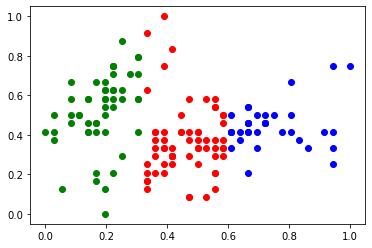

In [78]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1[0], df1[1], color='red')
plt.scatter(df2[0], df2[1], color='green')
plt.scatter(df3[0], df3[1], color='blue')

In [84]:
k_rng = range(1,11)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[[0]],df[[1]])
    sse.append(km.inertia_)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


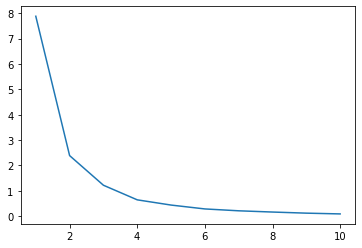

In [86]:
plt.plot(k_rng, sse)

In [87]:
df.head()


,0,1,cluster
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1
